# Stack Overflow Survey

## 1. Load and clean dataset

In [28]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [ ]:
df_20 = pd.read_csv('data/developer_survey_2020/survey_results_public.csv')
df_19 = pd.read_csv('data/developer_survey_2019/survey_results_public.csv')
df_18 = pd.read_csv('data/developer_survey_2018/survey_results_public.csv')
df_17 = pd.read_csv('data/developer_survey_2017/survey_results_public.csv')
df_16 = pd.read_csv('data/developer_survey_2016/survey_results_public.csv')
df_15 = pd.read_csv('data/developer_survey_2015/survey_results_public.csv', header=1, dtype=str)
df_14 = pd.read_csv('data/developer_survey_2014/survey_results_public.csv', header=1, dtype=str)
df_13 = pd.read_csv('data/developer_survey_2013/survey_results_public.csv', header=1, dtype=str)
df_12 = pd.read_csv('data/developer_survey_2012/survey_results_public.csv', header=1, dtype=str)
df_11 = pd.read_csv('data/developer_survey_2011/survey_results_public.csv', header=1, dtype=str)

In [4]:
df_20.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-employed",White or of European descent,Man,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunities for professional development",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work with,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other physical activity;Do other work and come back later,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of topics);Stack Overflow Jobs (for job seekers),Visit Stack Overflow;Go for a walk or other physical activity,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office environment or company culture;Opportunities for professional developmen

## 2. Exploratory Data Analysis

Questions:

1. Are you the "IT support person" for your family?
2. How do you pronouce "GIF"?
3. Tabs or spaces? (2015 and 2017)
4. Do you believe in aliens?
5. Dogs or cats?
6. Star Wars or Star Trek?
7. How much do you agree or disagree with the following statement? I want to go to Mars right now, even if there's a chance I never come back.
8. How many caffeinated beverages per day?

In [18]:
# Are you the "IT support person" for your family?
q1 = df_19['ITperson'].value_counts()  # Horizontal bar chart
q1

Yes                                         46370
SIGH                                        21819
Also Yes                                    12313
Fortunately, someone else has that title     6639
Name: ITperson, dtype: int64

In [19]:
# How do you pronouce "GIF"?
q2 = df_17['PronounceGIF'].value_counts()  # Horizontal bar chart
q2

With a hard "g," like "gift"              33484
With a soft "g," like "jiff"              13408
Enunciating each letter: "gee eye eff"     3085
Some other way                             1031
Name: PronounceGIF, dtype: int64

In [20]:
# Tabs or spaces?
q3_1 = df_17['TabsSpaces'].value_counts()  # Lines
q3_1

Tabs      16682
Spaces    14667
Both       7502
Name: TabsSpaces, dtype: int64

In [21]:
# Do you believe in aliens?
q4 = df_16['aliens'].value_counts()  # Bar chart
q4

Yes                       25742
No                        17243
Other (please specify)     6192
Name: aliens, dtype: int64

In [22]:
# Dogs or cats?
q5 = df_16['dogs_vs_cats'].value_counts()  # Bar chart
q5

Dogs                      22101
Cats                      15740
Other (please specify)     7398
Name: dogs_vs_cats, dtype: int64

In [23]:
# Star Wars or Star Trek?
q6 = df_16['star_wars_vs_star_trek'].value_counts()  # Bar chart
q6

Star Wars               22410
Star Trek                8148
Star Wars; Star Trek     3840
Name: star_wars_vs_star_trek, dtype: int64

In [24]:
# How much do you agree or disagree with the following statement?
# I want to go to Mars right now, even if there's a chance I never come back.
q7 = df_16['agree_mars'].value_counts()  # Horizontal bar chart stacked
q7

Disagree completely    21567
Disagree somewhat       6463
Neutral                 5217
Agree completely        4977
Agree somewhat          4461
Name: agree_mars, dtype: int64

In [25]:
# Tabs or spaces?
q3_2 = df_15['Tabs or Spaces'].value_counts()  # Lines
q3_2

Tabs          11604
Spaces         8663
It depends     4391
Huh?           1149
Name: Tabs or Spaces, dtype: int64

In [26]:
# How many caffeinated beverages per day?
q8 = df_15['How many caffeinated beverages per day?'].value_counts()  # Histogram
q8

0               3916
2               3587
1               2844
3               2492
4               1535
5               1099
6                456
More than 10     219
8                170
7                154
9                 38
Name: How many caffeinated beverages per day?, dtype: int64

In [ ]:
# Adjusting the orders
q8.reindex(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'More than 10'])

In [60]:
# Adjusting the labels
q1_x[1] = 'Sigh'
q4_x[2] = 'Other'
q5_x[2] = 'Other'
q6_x[2] = 'Both'

In [34]:
q1_x = q1.index.tolist()
q1_y = q1.to_list()

q2_x = q2.index.tolist()
q2_y = q2.to_list()

# q3_x = q3.index.tolist()
# q3_y = q3.to_list()

q4_x = q4.index.tolist()
q4_y = q4.to_list()

q5_x = q5.index.tolist()
q5_y = q5.to_list()

q6_x = q6.index.tolist()
q6_y = q6.to_list()

q7_x = q7.index.tolist()
q7_y = q7.to_list()

q8_x = q8.index.tolist()
q8_y = q8.to_list()

In [5]:
surveys = [df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20]
respondents = []

In [6]:
for survey in surveys:
    rows = survey.shape[0]
    respondents.append(rows)

In [ ]:
years = list(range(2011, 2021))

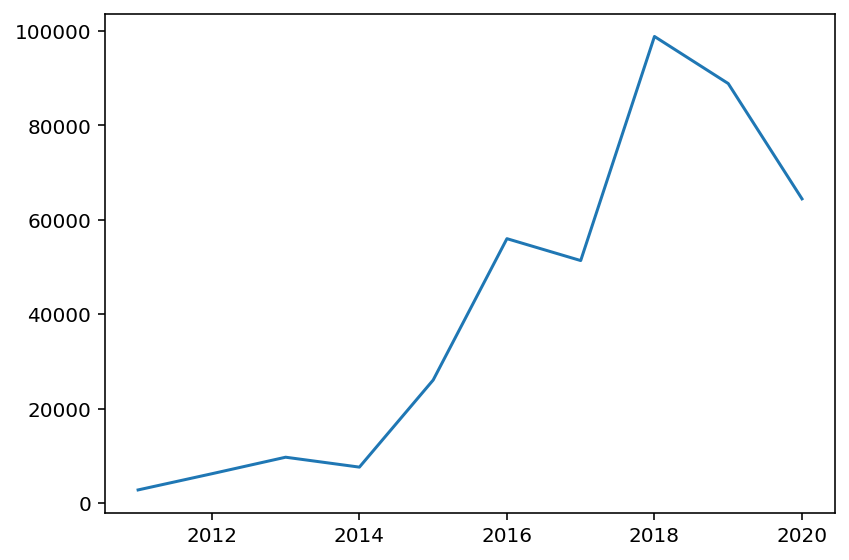

In [49]:
plt.plot(years, respondents)
plt.tight_layout(h_pad=4, w_pad=4)
plt.show();

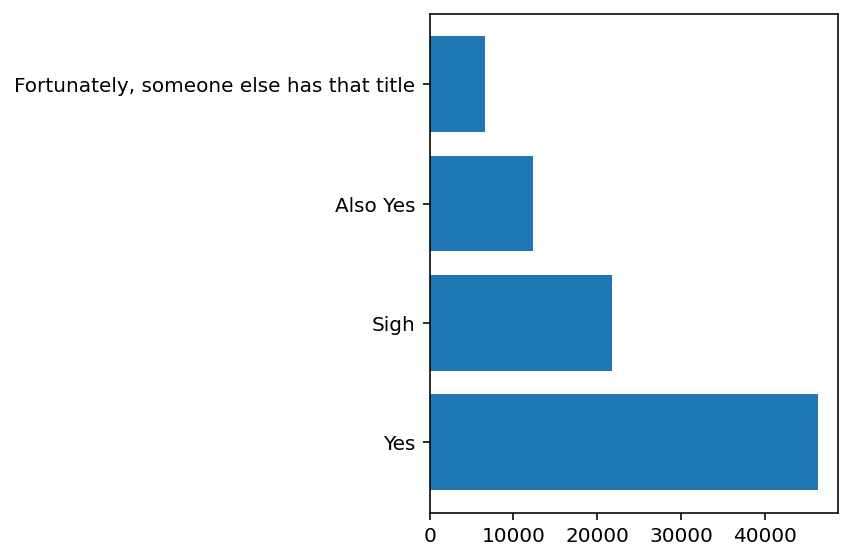

In [63]:
plt.barh(q1_x, q1_y)
plt.tight_layout(h_pad=4, w_pad=4)
plt.show();

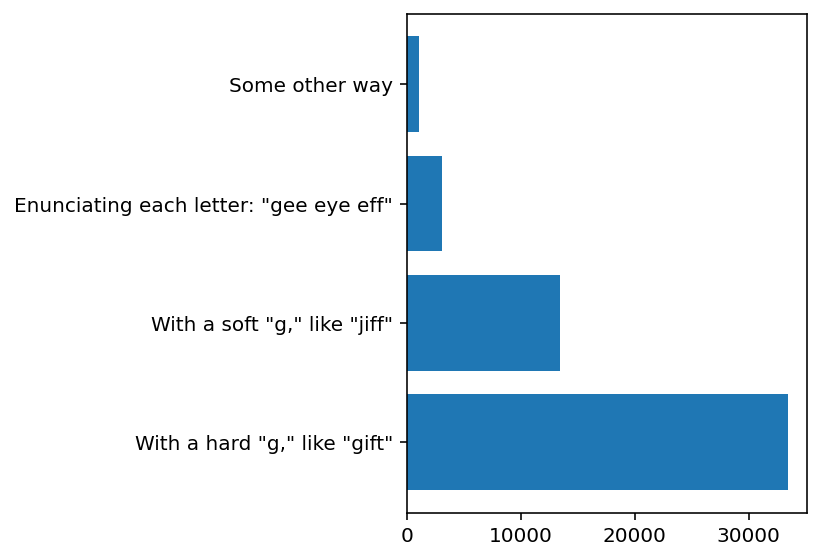

In [36]:
plt.barh(q2_x, q2_y)
plt.tight_layout(h_pad=4, w_pad=4)
plt.show();

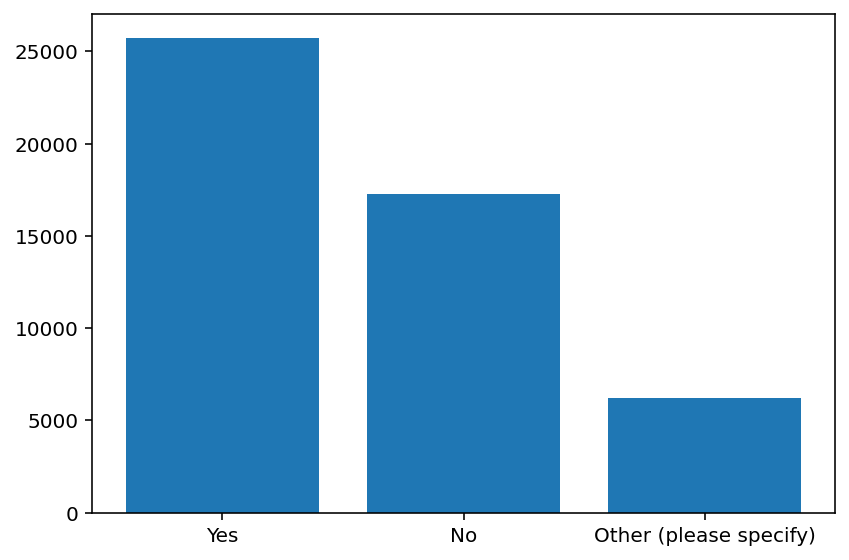

In [37]:
plt.bar(q4_x, q4_y)
plt.tight_layout(h_pad=4, w_pad=4)
plt.show();

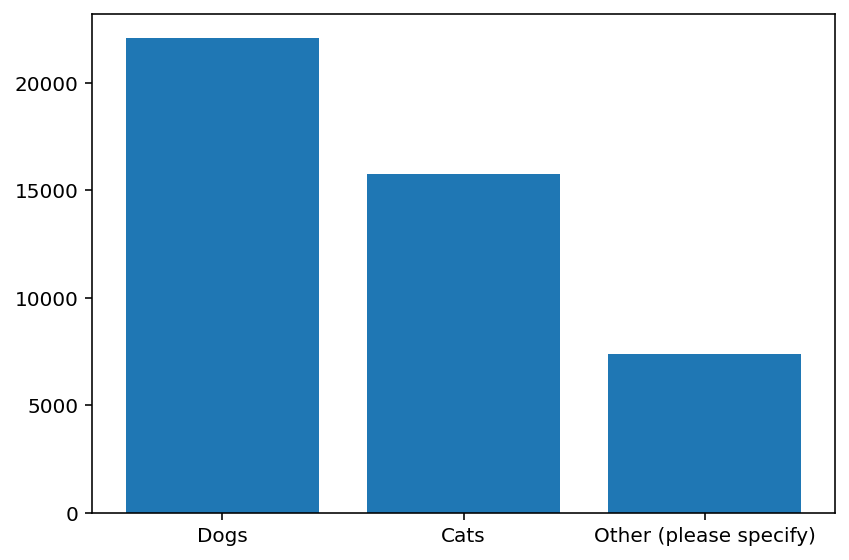

In [38]:
plt.bar(q5_x, q5_y)
plt.tight_layout(h_pad=4, w_pad=4)
plt.show();

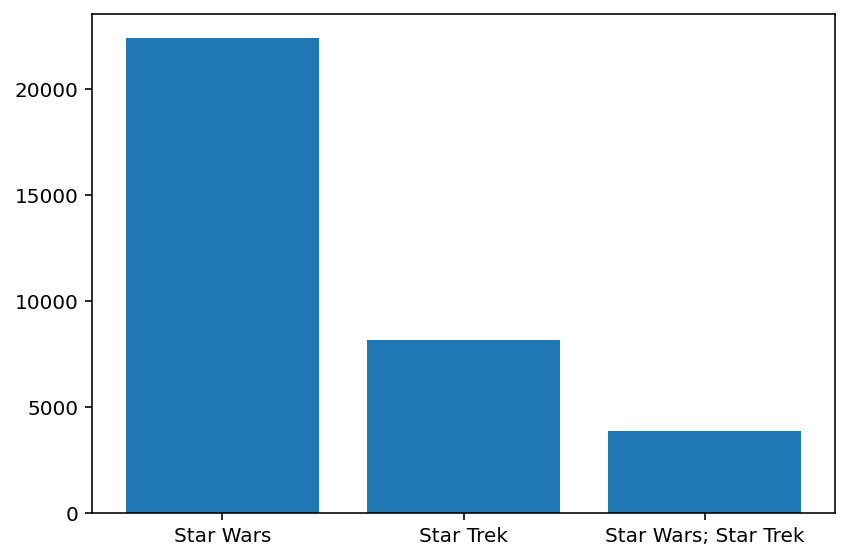

In [39]:
plt.bar(q6_x, q6_y)
plt.tight_layout(h_pad=4, w_pad=4)
plt.show();

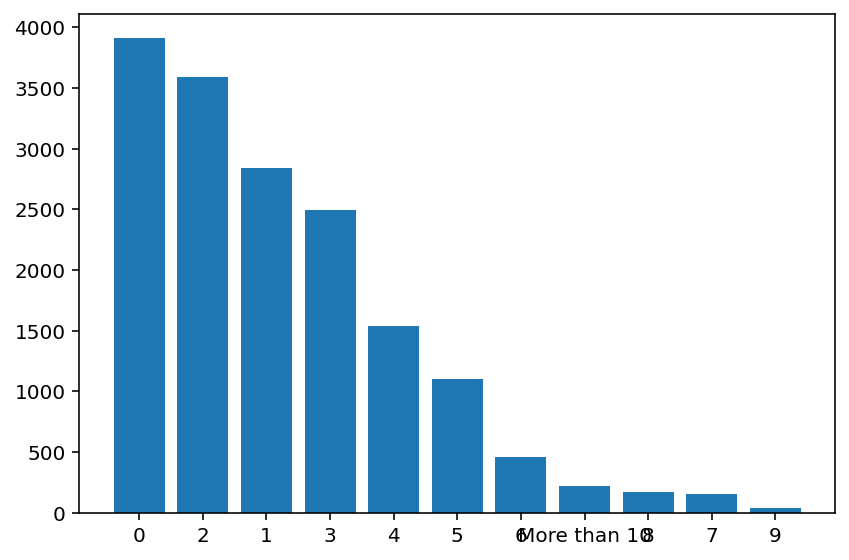

In [42]:
plt.bar(q8_x, q8_y)
plt.tight_layout(h_pad=4, w_pad=4)
plt.show();